In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter

In [ ]:
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
data=pd.read_csv(r"C:\Users\HP\Desktop\cyber-threat-intelligence_all.csv")
data.head()

,Unnamed: 0,index,text,entities,relations,Comments,id,label,start_offset,end_offset
0,0,1.0,This post is also available in: 日本語 (Japa...,"[{'id': 45800, 'label': 'malware', 'start_offs...",[],[],45800.0,malware,288.0,300.0
1,1,2.0,The attack vector is very basic and repeats it...,"[{'id': 48941, 'label': 'attack-pattern', 'sta...",[],[],48941.0,attack-pattern,69.0,115.0
2,2,3.0,Once executed by the user the first stage malw...,[],[],[],NaN,NaN,NaN,NaN
3,3,4.0,The first known campaign was launched by Crim...,"[{'id': 45806, 'label': 'TIME', 'start_offset'...",[],[],45806.0,TIME,55.0,68.0
4,4,5.0,The first stage downloaded the ransomware from...,[],[],[],NaN,NaN,NaN,NaN


EDA

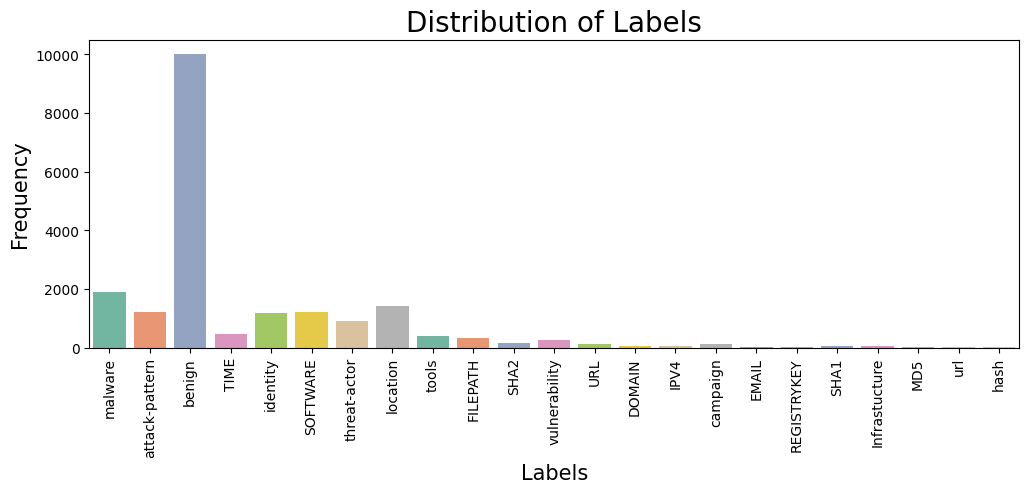

In [ ]:
# countplot for label distribution
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='label', palette='Set2')
plt.title('Distribution of Labels',size=20)
plt.xlabel('Labels',size=15)
plt.ylabel('Frequency',size=15)
plt.xticks(rotation=90)
plt.show()

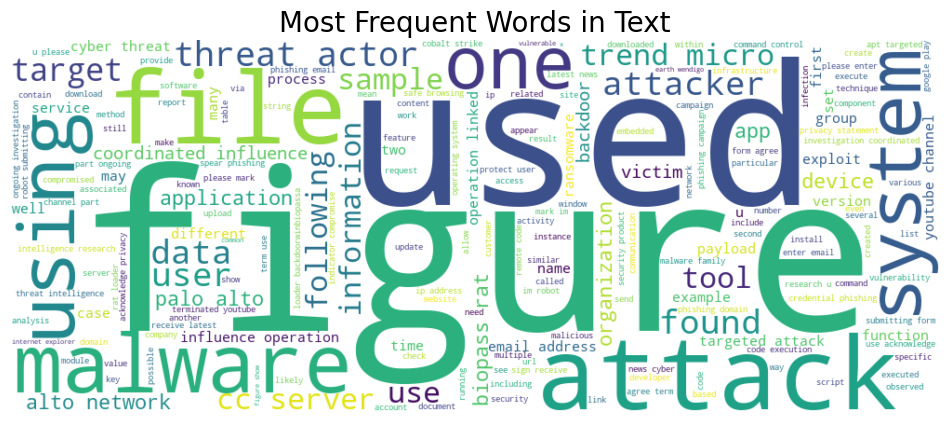

In [ ]:
# combine all clean_text into a single string
all_text = ' '.join(data['clean_text'])
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Text',size=20)
plt.show()

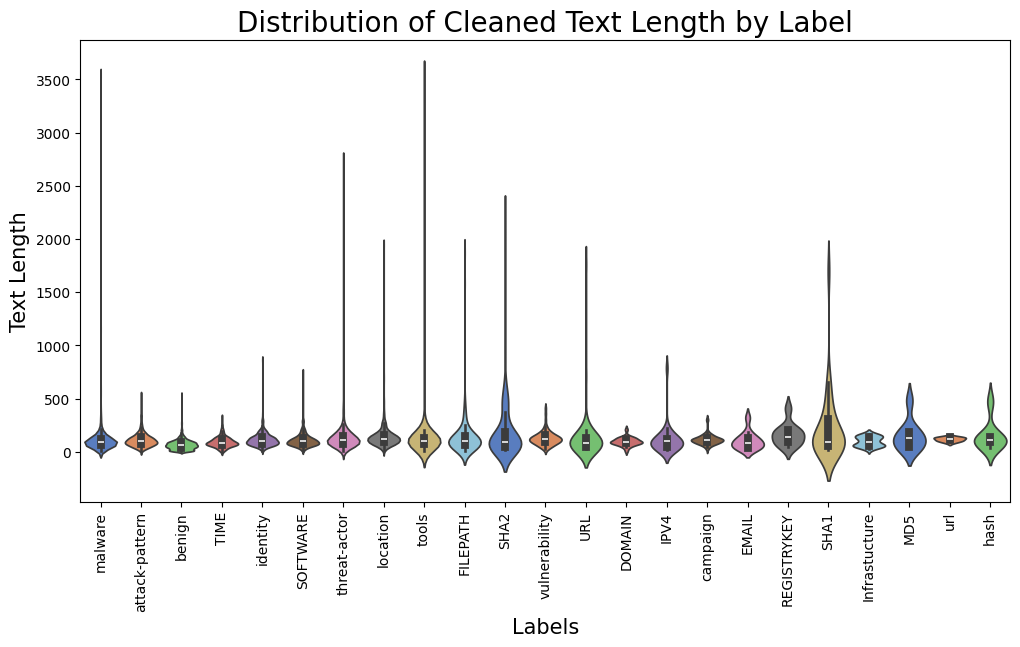

In [ ]:
# calculate text length
data['clean_text_length'] = data['clean_text'].apply(len)
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='label', y='clean_text_length', palette='muted')
plt.title('Distribution of Cleaned Text Length by Label',size=20)
plt.xlabel('Labels',size=15)
plt.ylabel('Text Length',size=15)
plt.xticks(rotation=90)
plt.show()

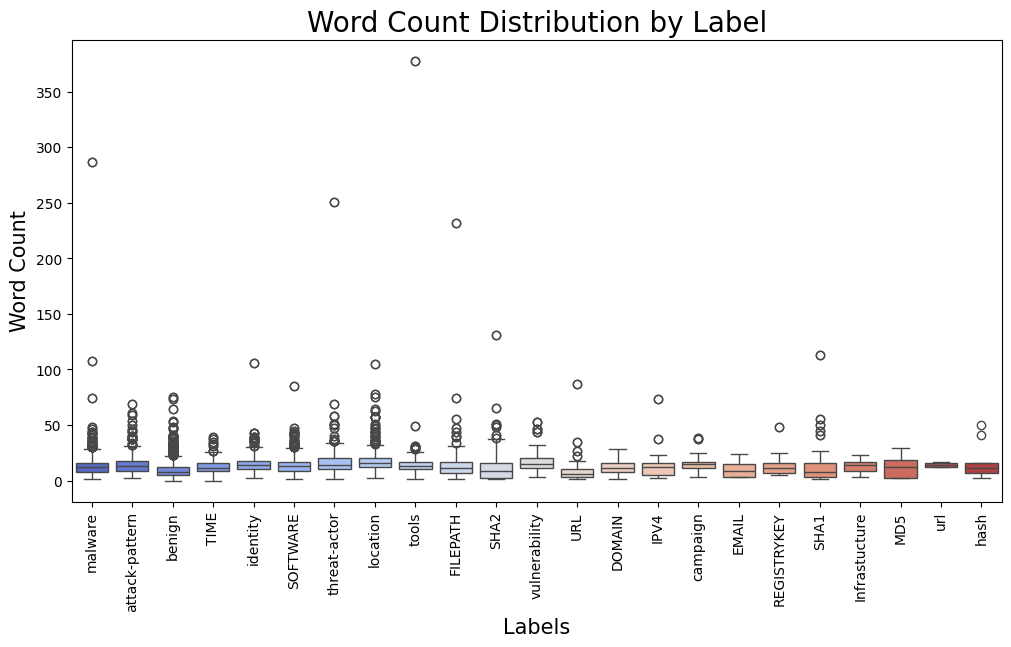

In [ ]:
# calculate word count
data['word_count'] = data['clean_text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='label', y='word_count', palette='coolwarm')
plt.title('Word Count Distribution by Label',size=20)
plt.xlabel('Labels',size=15)
plt.ylabel('Word Count',size=15)
plt.xticks(rotation=90)
plt.show()


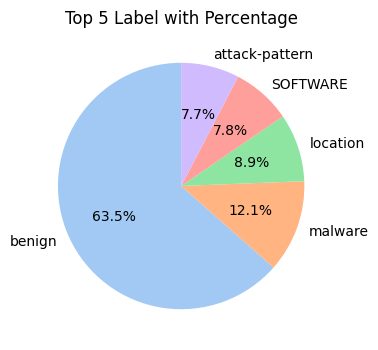

In [ ]:
# top 5 labels by their frequency
top_labels = data['label'].value_counts().nlargest(5)
plt.figure(figsize=(8, 4))
top_labels.plot.pie(autopct='%1.1f%%',startangle=90,colors=sns.color_palette("pastel"))
plt.title('Top 5 Label with Percentage')
plt.axis("off")
plt.show()

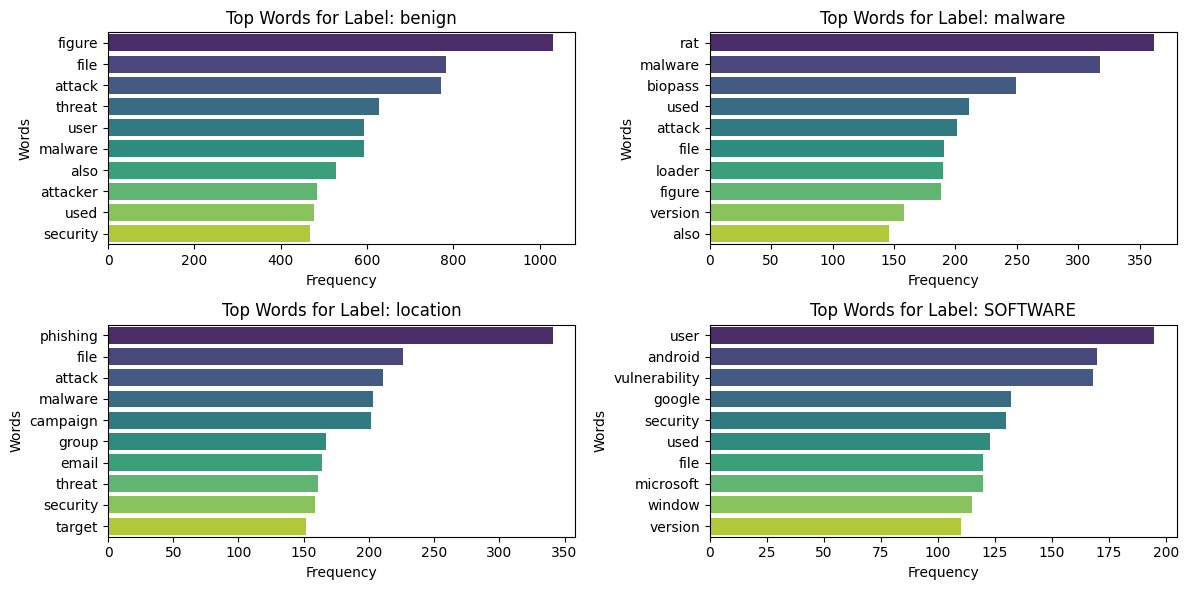

In [ ]:
# top 4 labels by frequency
top_labels = data['label'].value_counts().nlargest(4).index
fig, axes = plt.subplots(2, 2, figsize=(12, 6))
axes = axes.flatten()
for i, label in enumerate(top_labels):
    label_text = ' '.join(data[data['label'] == label]['clean_text'])
    common_words = Counter(label_text.split()).most_common(10)
    words, counts = zip(*common_words)

    sns.barplot(x=list(counts), y=list(words), palette='viridis', ax=axes[i])
    axes[i].set_title(f'Top Words for Label: {label}')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Words')
plt.tight_layout()
plt.show()

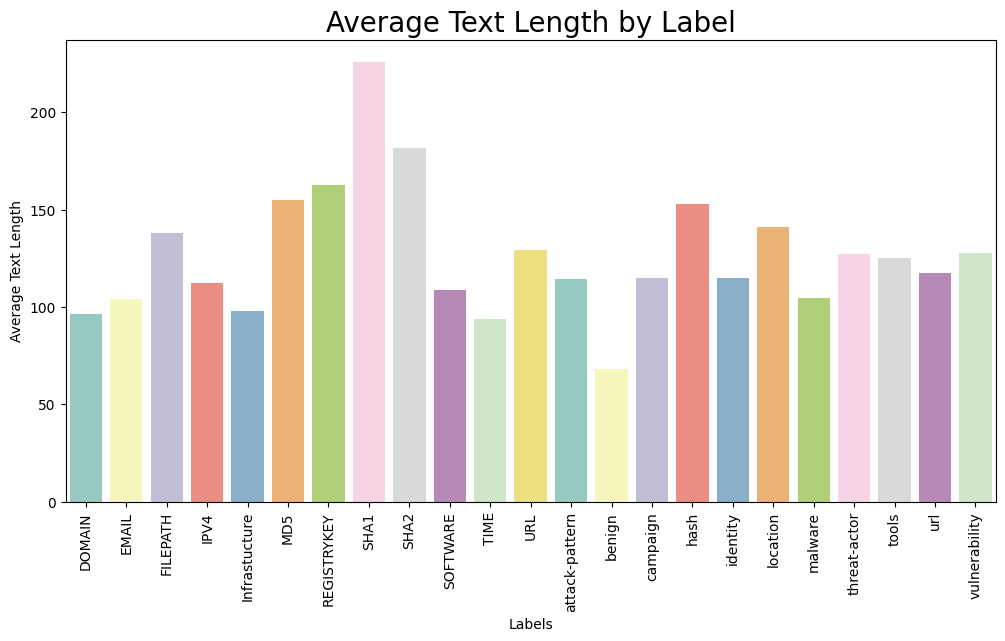

In [ ]:
# average text length by label
avg_length = data.groupby('label')['clean_text_length'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_length, x='label', y='clean_text_length', palette='Set3')
plt.title('Average Text Length by Label',size=20)
plt.xlabel('Labels')
plt.ylabel('Average Text Length')
plt.xticks(rotation=90)
plt.show()